In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [2]:
#importing file
ind=pd.read_csv('https://raw.githubusercontent.com/Lab-of-Infinity/Datatrained-Projects/main/Evaluation%20Project%204%20Global%20Power%20Plant%20Database/Powerplant_India.csv')

In [3]:
aus=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_AUS.csv')

In [4]:
usa=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_USA.csv')

This Dataset is a comprehensive, open source database of power plants around the world. 
The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants
(e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). 
Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. 

In [5]:
#merging the three file into one single flie
combine='combine'
df_combine=pd.concat([ind,aus,usa],ignore_index=True)
df_combine.to_csv(combine,index=False)


In [6]:
df_combine

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,generation_gwh_2018,generation_gwh_2019
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN,NaN,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489,1.670000,1.233490,U.S. Energy Information Administration,NaN,2.630,1.21100
13295,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN,1.161,1.58900
13296,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13297,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000,NaN,NaN,U.S. Energy Information Administration,NaN,NaN,NaN


In [7]:
df_combine.shape

(13299, 27)

After combining the three file we can see that there are total 13299 row and 27 columns

In [8]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13299 non-null  object 
 1   country_long              13299 non-null  object 
 2   name                      13299 non-null  object 
 3   gppd_idnr                 13299 non-null  object 
 4   capacity_mw               13293 non-null  float64
 5   latitude                  13221 non-null  float64
 6   longitude                 13221 non-null  float64
 7   primary_fuel              11270 non-null  object 
 8   other_fuel1               1629 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10357 non-null  float64
 12  owner                     12703 non-null  object 
 13  source                    13299 non-null  object 
 14  url   

Here we can see the information of dtype . there are 13 object dtype and 14 float64 dtype.
We can see that there are null values present in the data as the non null counts are not same.
estimated_generation_gwh and wepp_id are empty columns.

In [9]:
df_combine.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

This are the name of all the columns of the dataset.

In [10]:
#checking the null values
df_combine.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2029
other_fuel1                 11670
other_fuel2                 13029
other_fuel3                 13207
commissioning_year           2942
owner                         596
source                          0
url                             0
geolocation_source             23
wepp_id                     13299
year_of_capacity_data         946
generation_gwh_2013          6217
generation_gwh_2014          5806
generation_gwh_2015          5347
generation_gwh_2016          4639
generation_gwh_2017          4046
generation_data_source       2495
estimated_generation_gwh    13299
generation_gwh_2018          3929
generation_gwh_2019          3523
dtype: int64

This are the count of missing values present in each column.
There are some columns with 0 values and some have irrelevant data which need to be removed.

In [11]:
df_combine.nunique().to_frame('No of unique values')

,No of unique values
country,3
country_long,3
name,13267
gppd_idnr,13299
capacity_mw,2434
latitude,12386
longitude,12734
primary_fuel,14
other_fuel1,12
other_fuel2,11


This shows the unique value count of each column.

<Axes: >

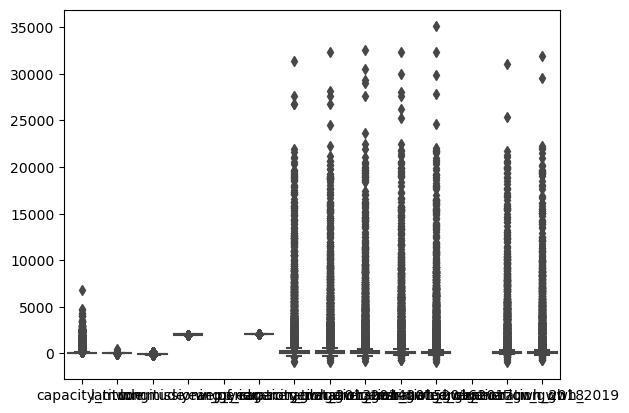

In [12]:
#dropping of duplicates values
df_combine.drop_duplicates(inplace=True)
sns.boxplot(df_combine)

In [13]:
df_combine.duplicated().sum()

0

After dropping the duplicate values we can see that there are no duplicate values.

In [14]:
df_combine.drop(["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

1.estimated_generation_gwh ,wepp_id,other_fuel3 are Empty.
2.other_fuel2 has 98% data missing.
3.owner has More than 60 % data missing.
4.year_of_capacity_data - Missing data with single unique value.
5.country, country_long, url and gppd_idnr are non relevalent info.
.so we have dropped it.

In [15]:
#filling the missing values
df_combine=df_combine.fillna(0)

<Axes: >

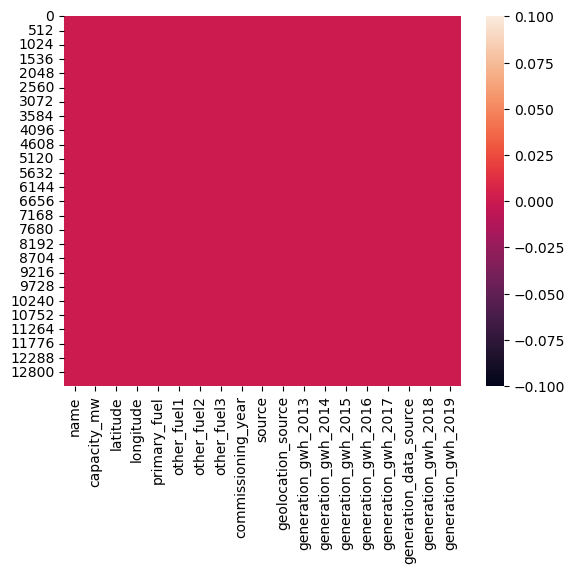

In [16]:
#checking null values through heat map
sns.heatmap(df_combine.isnull())

After filling all the null values we can see that there are no null values with the help of heatmap.
As it contain one colour (bright red) which is shown on the scale that is not negative so that means it has no null values.

In [17]:
df_combine.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,117.347785,34.846468,-73.351138,1556.145121,354.305687,357.963768,368.881145,365.619408,369.898860,290.834394,309.949595
std,345.782504,15.630045,62.945388,829.687821,1652.920637,1677.842390,1691.296943,1678.691778,1688.752836,1451.103146,1463.134110
min,0.000000,-42.888300,-171.712400,0.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000
25%,1.500000,33.826400,-104.583400,1930.146067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000,38.330300,-87.101100,1999.000000,0.000000,0.000000,0.148000,1.683000,2.789000,2.753000,3.941000
75%,52.750000,42.165950,-75.288550,2014.000000,33.146000,33.668000,38.877083,44.367000,50.702000,38.340000,46.120500
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,31097.259000,31920.368000


#This shows the statistical information of the numerical columns.
It has no negative values from the above abservation we can say that-

The count of all columns are same that means it has no missing values. 
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right. 
There is huge difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [18]:
#checking thr correlation
df_combine.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,-0.075408,0.122830,0.135997,0.782911,0.799726,0.817099,0.816447,0.815126,0.694271,0.728134
latitude,-0.075408,1.000000,-0.776121,0.389447,-0.043027,-0.045114,-0.048197,-0.052030,-0.052102,-0.011937,0.031238
longitude,0.122830,-0.776121,1.000000,-0.363643,0.078865,0.087196,0.092642,0.098790,0.102910,-0.022518,-0.062137
commissioning_year,0.135997,0.389447,-0.363643,1.000000,0.073289,0.075588,0.081613,0.084608,0.086498,0.075721,0.107638
generation_gwh_2013,0.782911,-0.043027,0.078865,0.073289,1.000000,0.962285,0.936351,0.904060,0.903691,0.796902,0.762275
generation_gwh_2014,0.799726,-0.045114,0.087196,0.075588,0.962285,1.000000,0.970143,0.938156,0.921881,0.805787,0.756540
generation_gwh_2015,0.817099,-0.048197,0.092642,0.081613,0.936351,0.970143,1.000000,0.964525,0.944541,0.813728,0.765860
generation_gwh_2016,0.816447,-0.052030,0.098790,0.084608,0.904060,0.938156,0.964525,1.000000,0.970642,0.815090,0.762137
generation_gwh_2017,0.815126,-0.052102,0.102910,0.086498,0.903691,0.921881,0.944541,0.970642,1.000000,0.814128,0.766036
generation_gwh_2018,0.694271,-0.011937,-0.022518,0.075721,0.796902,0.805787,0.813728,0.815090,0.814128,1.000000,0.902792


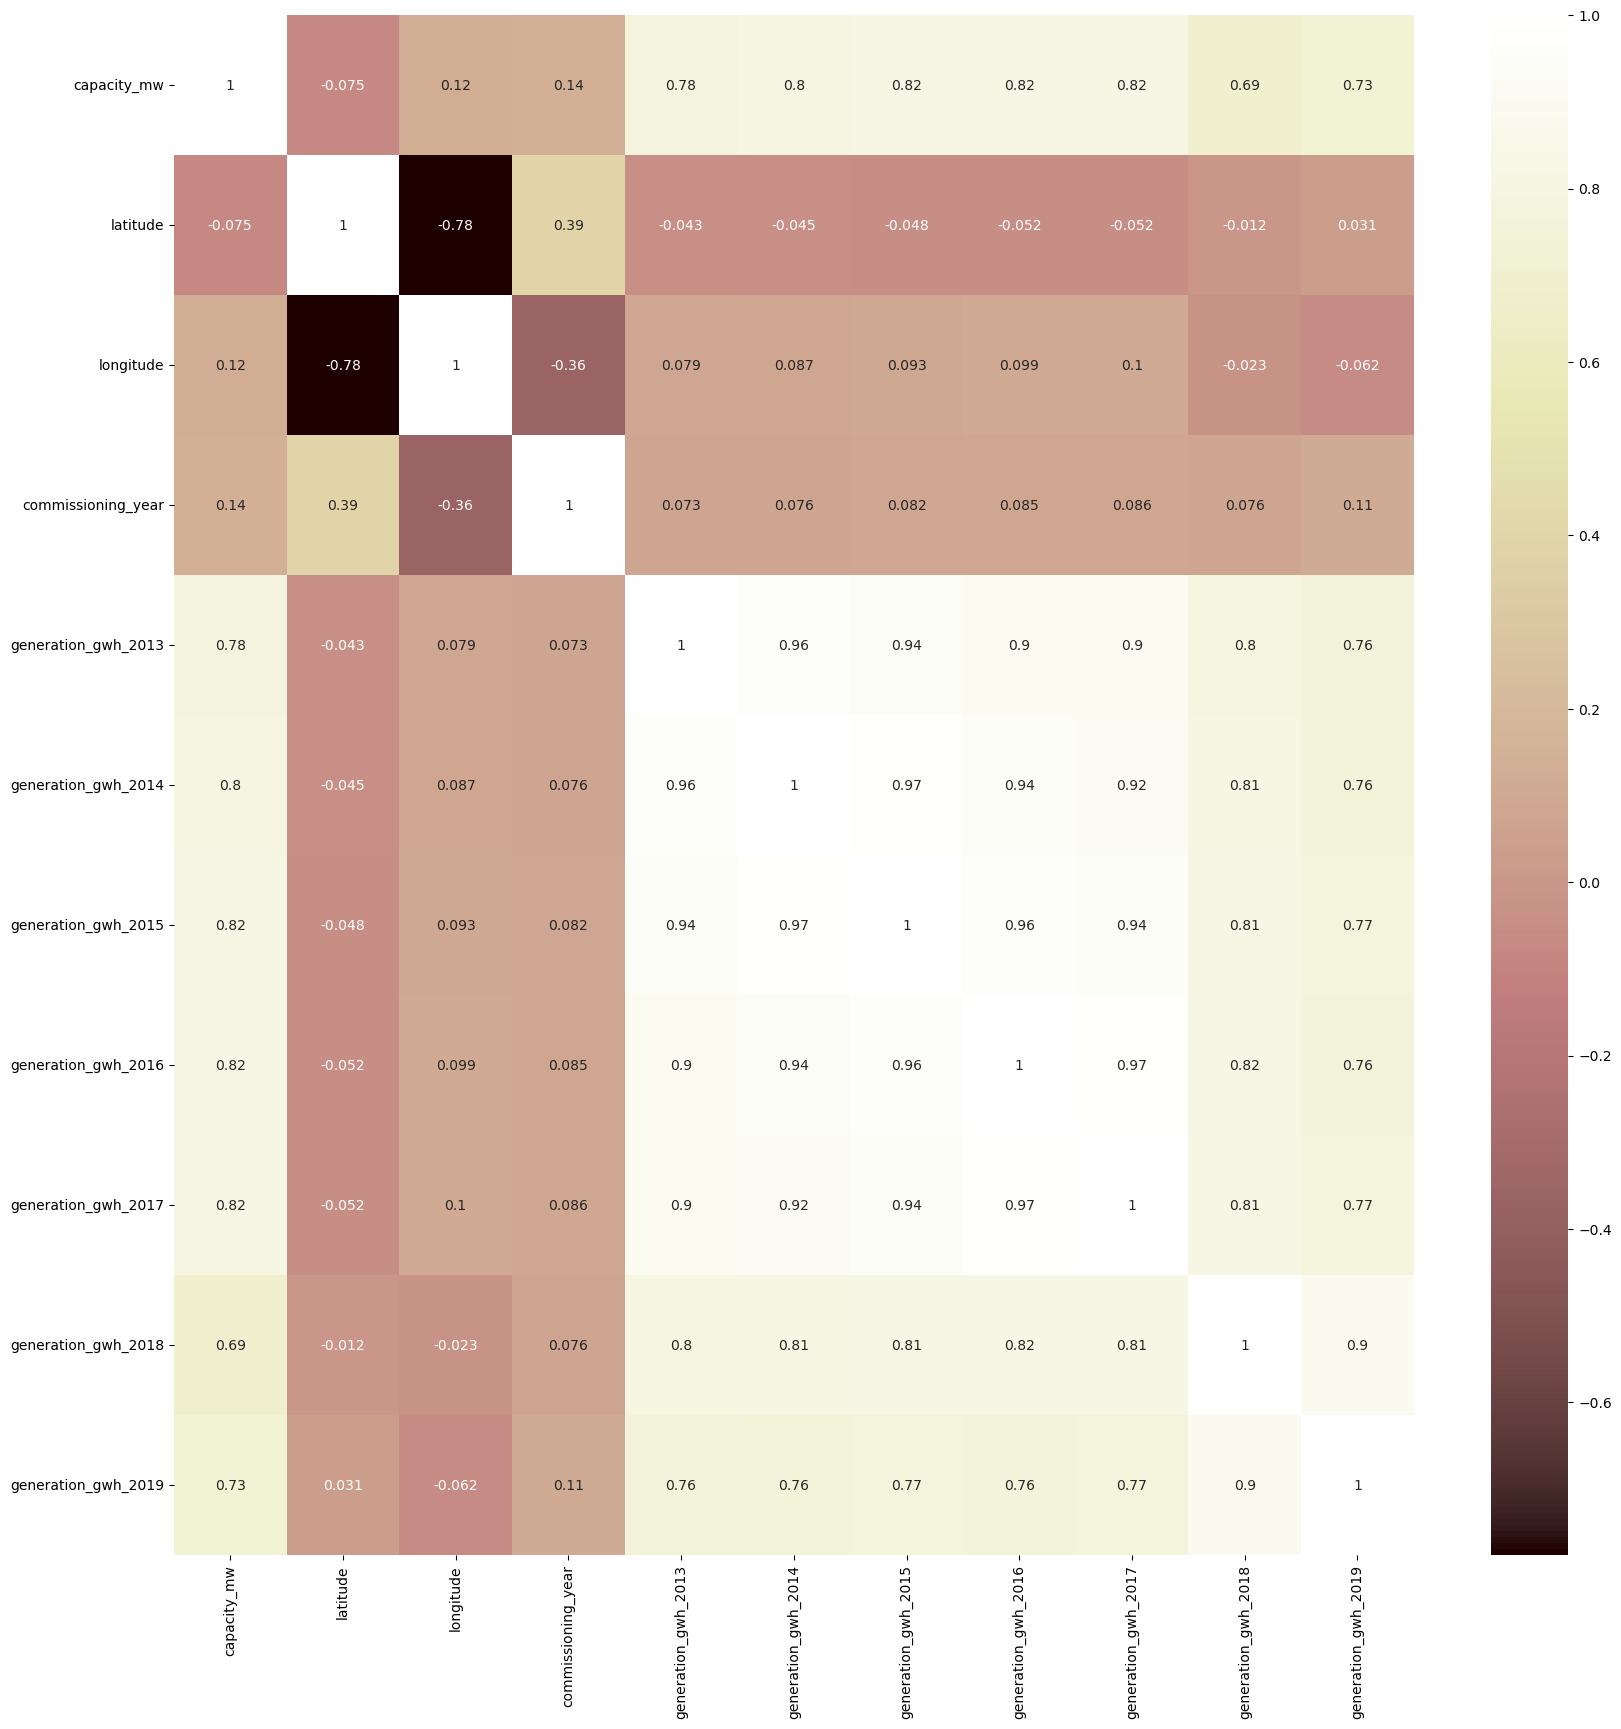

In [19]:
#checking of correlation with the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_combine.corr(),cmap='pink',annot=True)
plt.show()

Visualization of correlation through heatmap.
we can se that longitude and latitude are negatively correlated with each other.
generation_gwh_2013,2014,2015,2016,2017,2018 and 2019 are positively correlated with each other.

In [20]:
print('Minimum Capacity of Powerplant:',df_combine.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df_combine.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 6809.0


In [21]:
df_combine.primary_fuel.value_counts()

Solar           3476
Gas             2029
0               2029
Hydro           1778
Wind            1338
Oil              960
Waste            591
Coal             573
Biomass          228
Storage          104
Nuclear           67
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

Maximum Number of powerplant are solar based powerplant followed by Gas energy based powerplant.
There are only 67 Nuclear powerplant. Usually these powerplant build for high capacity.
Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [22]:
print('Total Power Generation Capacity of all Power Plants:',df_combine['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 1560608.187 MW


In [23]:
df_combine["capacity_mw"].groupby(df_combine["primary_fuel"]).agg([sum])

,sum
primary_fuel,
0,0.000
Biomass,6715.960
Coal,476115.320
Cogeneration,1042.000
Gas,591576.691
Geothermal,3889.200
Hydro,156513.220
Nuclear,113013.100
Oil,40281.580


Out of Total PowerGeneration Maximum power comes from gas.
Over all Power Generation capacity of coal powerplants is greater than Unconventional Energy sources based powerplant 
(biomass, wind,solar) combined.

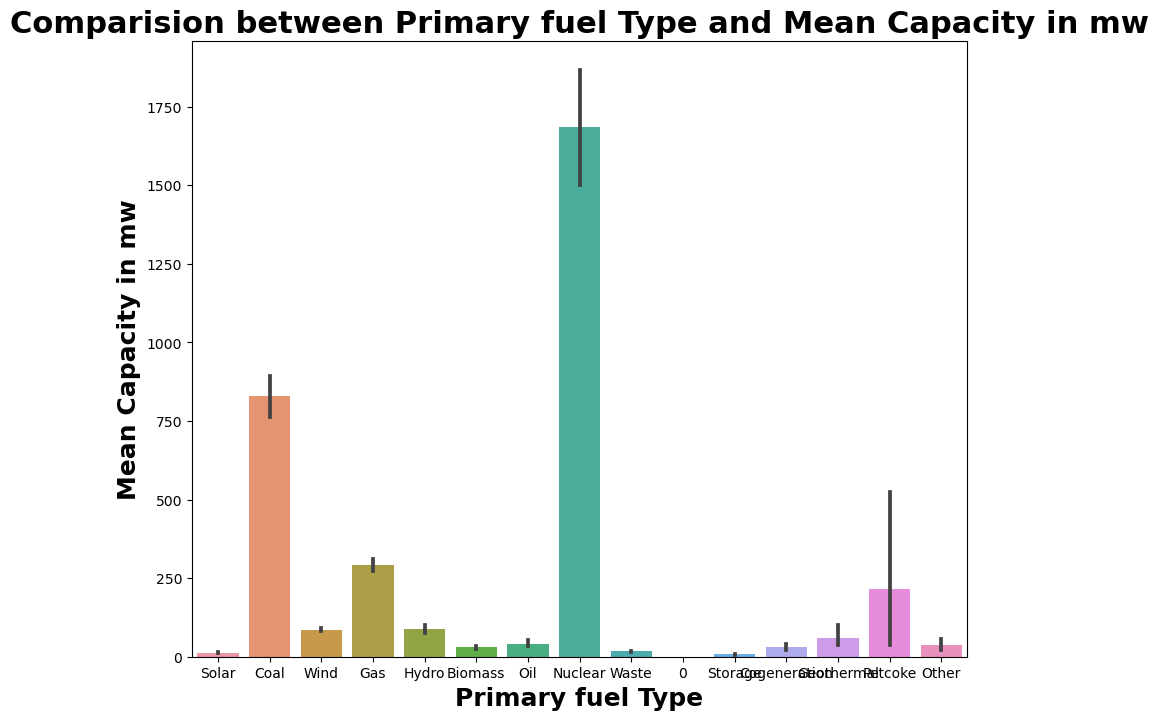

In [24]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df_combine["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df_combine)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.show()

As we can see that nuclear energy has the highest mean capicity over 1600.
coal has capicity over 800.

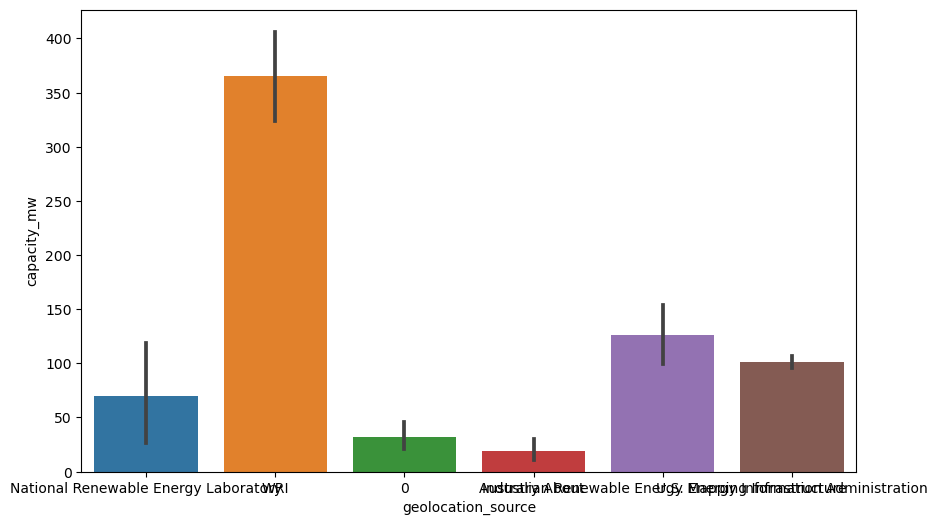

In [25]:
#Lets check the relation between geolocation_source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df_combine)
plt.show()

In [26]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
df_combine[['source','name']]=enc.fit_transform(df_combine[['source','name']])

In [27]:
#converting the mix data into numerical data
pd.to_numeric(df_combine['primary_fuel'], errors='coerce').fillna(0)
df_combine["primary_fuel"] = pd.to_numeric(df_combine['primary_fuel'], errors='coerce').fillna(0)

In [28]:
pd.to_numeric(df_combine['generation_data_source'], errors='coerce').fillna(0)
df_combine['generation_data_source'] = pd.to_numeric(df_combine['generation_data_source'], errors='coerce').fillna(0)

In [29]:
pd.to_numeric(df_combine['other_fuel1'], errors='coerce').fillna(0)
df_combine['other_fuel1'] = pd.to_numeric(df_combine['other_fuel1'], errors='coerce').fillna(0)

In [30]:
pd.to_numeric(df_combine['other_fuel2'], errors='coerce').fillna(0)
df_combine['other_fuel2'] = pd.to_numeric(df_combine['other_fuel2'], errors='coerce').fillna(0)

In [31]:
pd.to_numeric(df_combine['other_fuel3'], errors='coerce').fillna(0)
df_combine['other_fuel3'] = pd.to_numeric(df_combine['other_fuel3'], errors='coerce').fillna(0)

In [32]:
pd.to_numeric(df_combine['geolocation_source'], errors='coerce').fillna(0)
df_combine['geolocation_source'] = pd.to_numeric(df_combine['geolocation_source'], errors='coerce').fillna(0)

In [33]:
df_combine.sample(10)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,generation_gwh_2018,generation_gwh_2019
6270,5289.0,230.0,33.3500,-99.5400,0.0,0.0,0.0,0.0,2016.000000,185.0,0.0,0.000000,0.000000,0.000000,168.713000,851.540000,0.0,883.449000,878.886
5834,4838.0,165.6,32.7683,-99.4228,0.0,0.0,0.0,0.0,2009.000000,185.0,0.0,482.147000,514.455000,441.309000,459.455000,436.644000,0.0,361.577000,463.283
1692,300.0,4.0,44.6603,-74.8603,0.0,0.0,0.0,0.0,1927.000000,185.0,0.0,9.119000,24.760000,21.838000,20.175000,17.329000,0.0,13.679000,27.274
7775,7104.0,3.0,42.1117,-70.7094,0.0,0.0,0.0,0.0,2014.000000,185.0,0.0,0.045000,4.950000,5.369000,5.558000,5.212000,0.0,4.714000,4.831
8495,7921.0,352.0,40.6486,-74.0208,0.0,0.0,0.0,0.0,1972.000000,185.0,0.0,123.883997,25.190000,61.520000,79.461000,24.054000,0.0,71.060000,37.090
958,1533.0,39.6,-17.9810,122.2046,0.0,0.0,0.0,0.0,0.000000,12.0,0.0,143.763889,140.375556,134.916111,145.064167,138.547222,0.0,138.955556,0.000
10726,10420.0,446.0,42.5744,-73.8592,0.0,0.0,0.0,0.0,1993.519283,185.0,0.0,1969.744000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,118.649
10747,10440.0,8.5,34.0969,-118.4795,0.0,0.0,0.0,0.0,1982.000000,185.0,0.0,0.000000,0.000000,0.000000,4.312000,21.770000,0.0,0.000000,12.665
6522,5557.0,5.2,38.6460,-121.1626,0.0,0.0,0.0,0.0,2016.000000,185.0,0.0,0.000000,0.000000,0.000000,1.535000,8.539000,0.0,9.077000,8.130
5900,4910.0,0.0,39.7049,-80.8418,0.0,0.0,0.0,0.0,0.000000,185.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000


checking the data after converting all the data into numerical data.

name                         Axes(0.125,0.786098;0.227941x0.0939024)
capacity_mw               Axes(0.398529,0.786098;0.227941x0.0939024)
latitude                  Axes(0.672059,0.786098;0.227941x0.0939024)
longitude                    Axes(0.125,0.673415;0.227941x0.0939024)
primary_fuel              Axes(0.398529,0.673415;0.227941x0.0939024)
other_fuel1               Axes(0.672059,0.673415;0.227941x0.0939024)
other_fuel2                  Axes(0.125,0.560732;0.227941x0.0939024)
other_fuel3               Axes(0.398529,0.560732;0.227941x0.0939024)
commissioning_year        Axes(0.672059,0.560732;0.227941x0.0939024)
source                       Axes(0.125,0.448049;0.227941x0.0939024)
geolocation_source        Axes(0.398529,0.448049;0.227941x0.0939024)
generation_gwh_2013       Axes(0.672059,0.448049;0.227941x0.0939024)
generation_gwh_2014          Axes(0.125,0.335366;0.227941x0.0939024)
generation_gwh_2015       Axes(0.398529,0.335366;0.227941x0.0939024)
generation_gwh_2016       Axes(0.6

<Figure size 1500x2000 with 0 Axes>

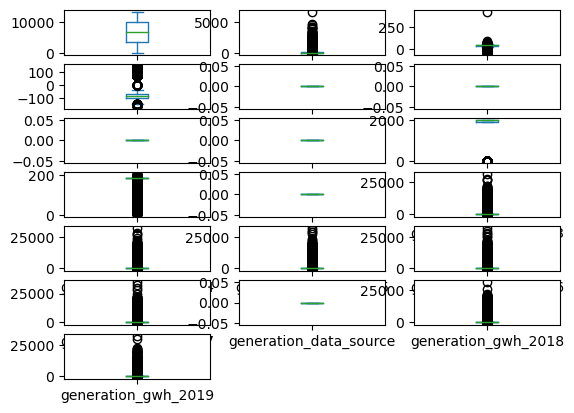

In [34]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
df_combine.plot(kind='box',subplots=True,layout=(7,3))

We can see that there are outliers in the columns.

In [35]:
#checking skewness
df_combine.skew()

name                      0.000218
capacity_mw               5.490267
latitude                 -1.809032
longitude                 2.291205
primary_fuel              0.000000
other_fuel1               0.000000
other_fuel2               0.000000
other_fuel3               0.000000
commissioning_year       -1.341089
source                   -2.698385
geolocation_source        0.000000
generation_gwh_2013       8.066019
generation_gwh_2014       8.101312
generation_gwh_2015       8.235279
generation_gwh_2016       8.297429
generation_gwh_2017       8.382525
generation_data_source    0.000000
generation_gwh_2018       9.085839
generation_gwh_2019       8.887062
dtype: float64

In [36]:
x=df_combine.iloc[:,:-1]
y=df_combine.iloc[:,-1]

In [37]:
#seperating independent and target variables
x=df_combine.drop('primary_fuel',axis=1)
y=df_combine['primary_fuel']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (13299, 18)
label dimension (13299,)


# MODEL BUILDING

In [38]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.71167802, -0.33215128, -0.42628277, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [-1.71089479, -0.05595573, -0.64494678, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [-1.70619543, -0.22601121, -0.82809453, ...,  0.        ,
        -0.2004305 , -0.21184746],
       ...,
       [ 1.73112922, -0.33938153,  0.5886021 , ...,  0.        ,
        -0.2004305 , -0.21184746],
       [ 1.7313903 , -0.33938153,  0.31292395, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [ 1.73165137, -0.31103895,  0.36560012, ...,  0.        ,
        -0.14858661, -0.16259171]])

In [39]:
#importing importand liberies
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [40]:
#checking accuracy score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 1.0 at random state 1


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [42]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
100.0
Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


In [43]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
100.0
Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


In [44]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
100.0
Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


In [45]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
100.0
Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


In [46]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
100.0
Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


# CROSS VALIDATION

In [47]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between R2score and cross validation 0.0


In [48]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between R2score and cross validation 0.0


In [49]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between R2score and cross validation 0.0


In [50]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between R2score and cross validation 0.0


In [51]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between R2score and cross validation 0.0


As we can see that all the model as 0 difference between R2 score and cross validation score so lets take any one and set the parameters.
We are taking Extratree regressor

# SETTING PARAMETERS

In [52]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [53]:
para={'n_estimators':[50,80,100],
      'criterion':['squared_error','poisson','absolute_error'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'n_estimators': 50, 'n_jobs': None}


In [54]:
#checking the new parameters
ex_new=ExtraTreesRegressor(criterion='squared_error',ccp_alpha=0.0,n_jobs=None,n_estimators=50)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

1.0


In [55]:
#checking the new parameters score
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 1.0
mean absolute error: 0.0
mean square error; 0.0
root mean squre error: 0.0


In [56]:
#importing pickle and storing the file
import joblib
import pickle
filename="Global power plant.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [57]:
load_m=pickle.load(open('Global power plant.pkl','rb'))

In [58]:
#checking the result
result=load_m.score(x_test,y_test)
print(result*100)

100.0


In [59]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989
predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orginal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# BUILDING MODEL WITH capicity_mw

In [60]:
#seperating independent and target variables
x=df_combine.drop('capacity_mw',axis=1)
y=df_combine['capacity_mw']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (13299, 18)
label dimension (13299,)


In [61]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.71167802, -0.42628277,  2.32896093, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [-1.71089479, -0.64494678,  2.35069964, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [-1.70619543, -0.82809453,  2.26751647, ...,  0.        ,
        -0.2004305 , -0.21184746],
       ...,
       [ 1.73112922,  0.5886021 , -0.30835605, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [ 1.7313903 ,  0.31292395, -0.50308773, ...,  0.        ,
        -0.2004305 , -0.21184746],
       [ 1.73165137,  0.36560012, -0.61478875, ...,  0.        ,
        -0.14858661, -0.16259171]])

In [62]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.7680144489068561 at random state 3


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [64]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.13644982377839565
14.888647563877456
Mean absolute error: 88.28269374365914
Mean square error: 92641.52499627773
Root mean square error: 304.3707032489785


In [65]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9754812703408314
87.16925930099627
Mean absolute error: 41.87915449122807
Mean square error: 13965.932289463035
Root mean square error: 118.17754562294411


In [66]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8599844837445306
82.12556877434196
Mean absolute error: 50.80355614035088
Mean square error: 19455.860114886986
Root mean square error: 139.4842647573087


In [67]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
88.25754617070137
Mean absolute error: 39.65393054887218
Mean square error: 12781.35993387071
Root mean square error: 113.05467674479773


In [68]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.7173896952554779
76.80144489068562
Mean absolute error: 77.20325588029952
Mean square error: 25251.032459507063
Root mean square error: 158.90573450793732


# CROSS VALIDATION

In [69]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.07818365 0.18969967 0.15835762 0.18022189 0.19415131]
0.16012282576001594
difference between R2score and cross validation 60.78916231468402


In [70]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.59767159 0.79685943 0.79367336 0.77687038 0.82612608]
0.7582401663673427
difference between R2score and cross validation 0.9774282539513401


In [71]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.73892153 0.84096    0.85014598 0.8541825  0.88726844]
0.8342956900424964
difference between R2score and cross validation -6.628124113564027


In [72]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.11888522 0.68879789 0.74295959 0.6579143  0.7471496 ]
0.59114131862139
difference between R2score and cross validation 17.687313028546615


ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# SETTING PARAMETERS

In [73]:
para={'n_estimators':[50,100],
      'criterion':['squared_error','poisson'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'n_estimators': 100, 'n_jobs': None}


In [74]:
ex_new=ExtraTreesRegressor(criterion='squared_error',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.8831537715011337


In [75]:
#checking the parameters score
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.880854266360619
mean absolute error: 40.01435109774436
mean square error; 12968.707634432953
root mean squre error: 113.88023373014718


In [80]:
#importing pickle and storing the file
import joblib
import pickle
filename="Global power plant capacity.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [81]:
load_m=pickle.load(open('Global power plant capacity.pkl','rb'))

In [82]:
#checking the result
result=load_m.score(x_test,y_test)
print(result*100)

88.0854266360619


In [83]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989
predicted,76.922,0.0,36.171,0.0,223.958,9.702,631.483,282.956,1.019,1.995,...,5.057,1242.004,29.749,4.285,43.722,3.789,7.531,0.0,0.0,4.027
orginal,45.000,0.0,21.000,0.0,133.200,1.800,630.000,42.000,1.000,1.500,...,1.300,1000.000,47.400,5.000,56.700,4.200,5.000,0.0,0.0,2.400
